In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from xml.etree import ElementTree as ET

plt.style.use('ggplot')

%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Importing the dataset

In [5]:
df_sales = pd.read_csv('datasets/real_property_sales_and_transfers.csv')

C:\Users\tcasey\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
sales_dict = pd.read_excel('datasets/RealPropertyMetaData.xlsx', sheetname='Sales_Transfers', header=3, parse_cols=[1,2,3,5])
sales_dict

,Field Name,Example,Column Type,Description
0,PIN,163752899,Text,Assessor's Property Identification Number
1,SCHEDNUM,0231416005000,Text,Assessor's Schedule Number
2,RECEPTION_NUM,2011148564,Text,Clerk & Recorder's Reception Number
3,RECEPTION_DATE,20101004,Text,Clerk & Recorder's Reception Date
4,INSTRUMENT,WD,Text,Type of Instrument
5,SALE_YEAR,2010,Text,Sale Year
6,SALE_MONTHDAY,0928,Text,Sale Month/Day
7,SALE_PRICE,199677,Text,Sale Price
8,GRANTOR,"SMITH, JOHN & JANE",Text,Person(s) relinquishing ownership
9,GRANTEE,"BROWN, JAMES",Text,Person(s) recieving ownership


## Filtering the dataset to only show single family home sales

In [7]:
single_family_home = 'SINGLE FAMILY'

df_sales = df_sales[df_sales.D_CLASS_CN == single_family_home]

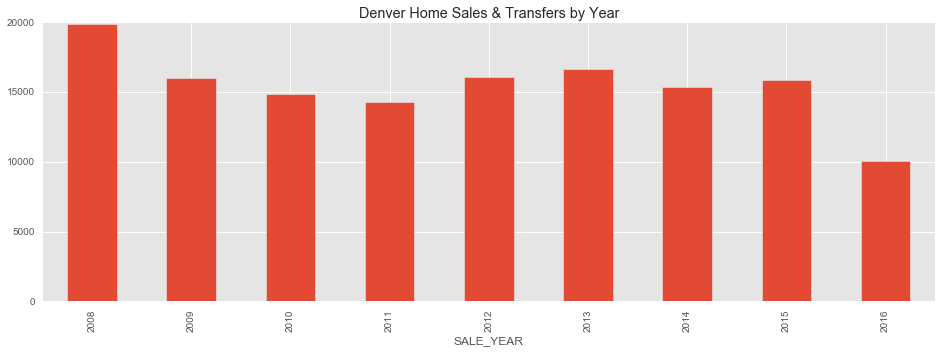

In [8]:
df_sales.groupby('SALE_YEAR').size().plot('bar', 
                                          figsize=(16, 5),
                                          title= "Denver Home Sales & Transfers by Year")

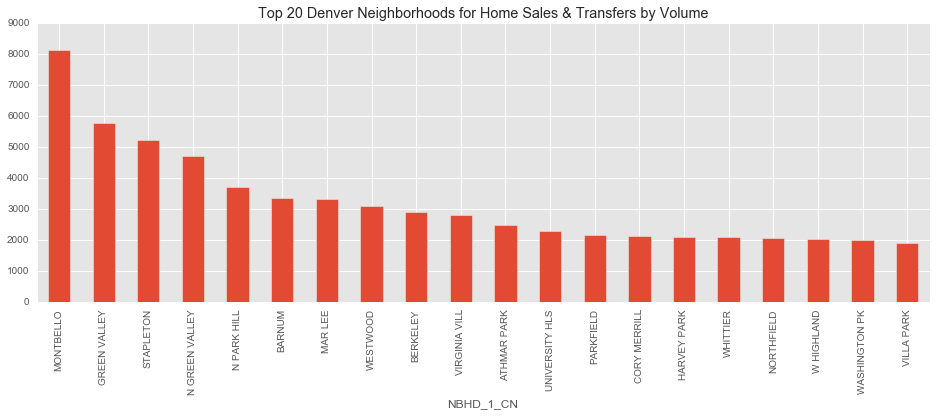

In [20]:
df_sales.groupby('NBHD_1_CN').size().sort_values(ascending=False).head(20).plot('bar', 
                                          figsize=(16, 5),
                                          title= "Top 20 Denver Neighborhoods for Home Sales & Transfers by Volume")

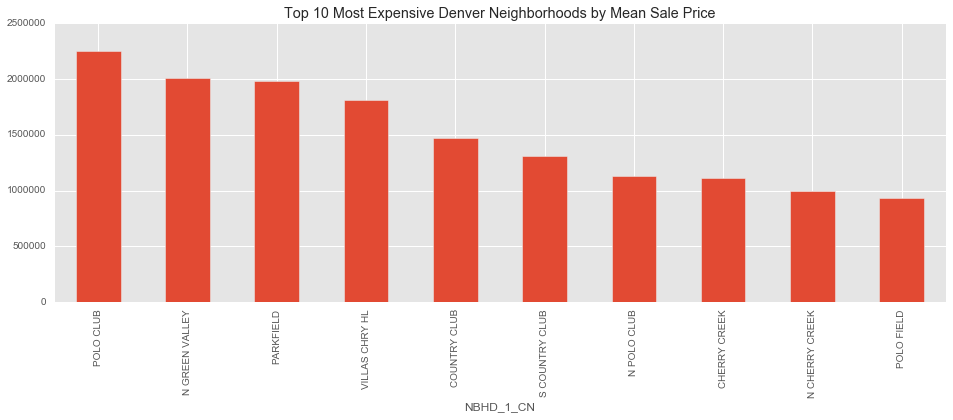

In [90]:
df_sales.groupby('NBHD_1_CN')['SALE_PRICE'].mean().sort_values(ascending=False).head(10).plot('bar', 
                                          figsize=(16, 5),
                                          title= "Top 10 Most Expensive Denver Neighborhoods by Mean Sale Price")

## Adding datetime and setting it as the index

In [32]:
days = []
months = []
years = df_sales.SALE_YEAR.astype(str)
datetimes = []

for row in df_sales.SALE_MONTHDAY:
    row = str(row)
    if len(row) < 4:
        row = '0' + row
    days.append(row[:-2])
    months.append(row[2:])
    
df_sales['date'] = years + '-' + months + '-' + days

df_sales['date'] = pd.to_datetime(df_sales['date'], format='%Y-%d-%m')

df_sales.index = df_sales.date

df_sales['year'] = df_sales.index.year
df_sales['month'] = df_sales.index.month
df_sales['day'] = df_sales.index.day

In [60]:
sales_2016.values

array([ 849,  887, 1132, 1227, 1200, 1229, 1112, 1099,   85], dtype=int64)

In [62]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_2013 = df_sales['2013']['SALE_PRICE'].resample('M', how='count')
sales_2014 = df_sales['2014']['SALE_PRICE'].resample('M', how='count')
sales_2015 = df_sales['2015']['SALE_PRICE'].resample('M', how='count')
sales_2016 = df_sales['2016']['SALE_PRICE'].resample('M', how='count')

monthly_df = pd.DataFrame({'Month': months,
                           '2013' : sales_2013.values,
                           '2014' : sales_2014.values,
                           '2015' : sales_2015.values})

C:\Users\tcasey\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  from ipykernel import kernelapp as app
C:\Users\tcasey\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  app.launch_new_instance()
C:\Users\tcasey\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
C:\Users\tcasey\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()


In [91]:
monthly_df.index = monthly_df.Month

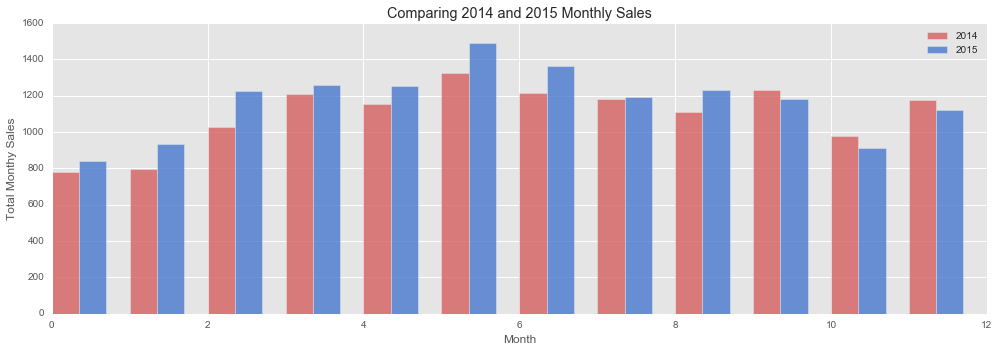

In [89]:
# data to plot
n_groups = 12

# create plot
fig, ax = plt.subplots(figsize=(14,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, monthly_df['2014'], bar_width,
                 alpha=opacity,
                 color='r',
                 label='2014')
 
rects2 = plt.bar(index + bar_width, monthly_df['2015'], bar_width,
                 alpha=opacity,
                 color='b',
                 label='2015')
 
plt.xlabel('Month')
plt.ylabel('Total Monthy Sales')
plt.title('Comparing 2014 and 2015 Monthly Sales')
plt.legend()
 
plt.tight_layout()
plt.show()

In [49]:
df_yearly_instruments = df_sales.groupby(['SALE_YEAR', 'INSTRUMENT']).size().unstack().fillna(0)
top_instruments = df_yearly_instruments.sum().sort_values(ascending=False).head().index